<a href="https://colab.research.google.com/github/Kharebova-Irina/CNN_boys-girls/blob/main/%D0%94%D0%B8%D0%BF%D0%BB%D0%BE%D0%BC_%D0%BA%D1%83%D1%80%D1%81%D1%8B_%D0%98%D0%98_%D0%BD%D0%B0_%D1%8F%D0%B7%D1%8B%D0%BA%D0%B5_%D0%BF%D0%B8%D1%82%D0%BE%D0%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Импорт необходимых библиотек

from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Подключение к дисковому пространству на гугл диске

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Распаковка zip-файла "МОЙ_ДАТАСЕТ.zip" в каталог /content/Untitled_Folder

!unzip -qo "МОЙ_ДАТАСЕТ.zip" -d /content/Untitled_Folder

In [ ]:
import numpy as np

In [ ]:
from PIL import Image

In [ ]:
# Формирование пути к каталогу

IMAGE_PATH='/content/Untitled_Folder/МОЙ_ДАТАСЕТ'

In [ ]:
import os

In [ ]:
# Вывод содержимого каталога

CLASS_PEOPLE=os.listdir(IMAGE_PATH)
CLASS_COUNT=len(CLASS_PEOPLE)

print(f'В директории PEOPLE {CLASS_COUNT} класса: {CLASS_PEOPLE}')
print(f'Длина массива: {CLASS_COUNT}')

В директории PEOPLE 2 класса: ['Женщины', 'Мужчины']
Длина массива: 2


In [ ]:
data_files = []                           # Cписок путей к файлам картинок
data_labels = []                          # Список меток классов, соответствующих файлам

for class_label in range(CLASS_COUNT):    # Для всех классов по порядку номеров (их меток)
    class_name = CLASS_PEOPLE[class_label]  # Выборка имени класса из списка имен
    class_path = IMAGE_PATH + '/' + class_name  # Формирование полного пути к папке с изображениями класса
    class_files = os.listdir(class_path)  # Получение списка имен файлов с изображениями текущего класса
    print(f'Размер класса {class_name} составляет {len(class_files)} человек')

    # Добавление к общему списку всех файлов класса с добавлением родительского пути
    data_files += [f'{class_path}/{file_name}' for file_name in class_files]

    # Добавление к общему списку меток текущего класса - их ровно столько, сколько файлов в классе
    data_labels += [class_label] * len(class_files)

print('Общий размер базы для обучения:', len(data_labels))

Размер класса Женщины составляет 100 человек
Размер класса Мужчины составляет 99 человек
Общий размер базы для обучения: 199


In [ ]:
import numpy as np                        # Библиотека работы с массивами

data_images = []                          # Пустой список для данных изображений

for file_name in data_files:
    # Открытие и смена размера изображения
    img = Image.open(file_name).resize((200, 200))
    img_np = np.array(img)                # Перевод в numpy-массив
    data_images.append(img_np)            # Добавление изображения в виде numpy-массива к общему списку
    print(img_np.shape, " ", file_name)


x_data = np.array(data_images)            # Перевод общего списка изображений в numpy-массив
y_data = np.array(data_labels)            # Перевод общего списка меток класса в numpy-массив

print(f'В массив собрано {len(data_images)} фотографий следующей формы: {img_np.shape}')
print(f'Общий массив данных изображений следующей формы: {x_data.shape}')
print(f'Общий массив меток классов следующей формы: {y_data.shape}')

(200, 200, 3)   /content/Untitled_Folder/МОЙ_ДАТАСЕТ/Женщины/44955c74648861.5c361b818bd58.jpg
(200, 200, 3)   /content/Untitled_Folder/МОЙ_ДАТАСЕТ/Женщины/misa-campo-4.webp
(200, 200, 3)   /content/Untitled_Folder/МОЙ_ДАТАСЕТ/Женщины/499b5bad1b44b18ca7531b575d9c7a49.jpg
(200, 200, 3)   /content/Untitled_Folder/МОЙ_ДАТАСЕТ/Женщины/women-model-portrait-long-hair-red-wall-bricks-photography-dress-black-hair-fashion-emotion-red-skirt-romance-girl-beauty-woman-lady-photograph-darkness-image-portrait-photography-photo-shoot-21.jpg
(200, 200, 3)   /content/Untitled_Folder/МОЙ_ДАТАСЕТ/Женщины/maxresdefault (3).jpg
(200, 200, 3)   /content/Untitled_Folder/МОЙ_ДАТАСЕТ/Женщины/13-12.jpg
(200, 200, 3)   /content/Untitled_Folder/МОЙ_ДАТАСЕТ/Женщины/b65895039c29980a86d43a14cc328284.jpg
(200, 200, 3)   /content/Untitled_Folder/МОЙ_ДАТАСЕТ/Женщины/ulybka-devushka-asfalt-vzglyad.jpg
(200, 200, 3)   /content/Untitled_Folder/МОЙ_ДАТАСЕТ/Женщины/2737591391.jpg
(200, 200, 3)   /content/Untitled_Folder/МОЙ_

In [ ]:
# Создание генератора обучения, подготовка и аугментация изображений

train_datagen = ImageDataGenerator(
       rescale=1./255,
       rotation_range=20,
       width_shift_range=0.2,
       height_shift_range=0.2,
       shear_range=0.2,
       zoom_range=0.2,
       horizontal_flip=True,
       fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/Untitled_Folder/МОЙ_ДАТАСЕТ',
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    '/content/Untitled_Folder/МОЙ_ДАТАСЕТ',
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical'
)

Found 188 images belonging to 2 classes.
Found 188 images belonging to 2 classes.


In [ ]:
# Реализация свёрточной нейронной сети через Conv2D (выполняет операцию свёртки), MaxPooling2D (извлечение важной информации)

model=Sequential()
model.add(Conv2D(32, (2, 2), activation='relu', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

#  Преобразование массивов в одномерный массив через Flatten

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=CLASS_COUNT, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Вывод архитектуры модели

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 200, 200, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 100, 100, 64)        │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 50, 50, 128)         │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 25, 25, 256)         │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 512)         │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,359,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,057,378 (11.66 MB)

 Trainable params: 3,057,378 (11.66 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Обучение нейросети

history = model.fit(
       train_generator,
       steps_per_epoch=train_generator.samples // train_generator.batch_size,
       validation_data=validation_generator,
       validation_steps=validation_generator.samples // validation_generator.batch_size,
       epochs=20
)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 29s 5s/step - accuracy: 0.6644 - loss: 0.6309 - val_accuracy: 0.7375 - val_loss: 0.5526
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.7500 - loss: 0.5616 - val_accuracy: 0.7857 - val_loss: 0.5288
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.6492 - loss: 0.5875 - val_accuracy: 0.7625 - val_loss: 0.5149
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.8438 - loss: 0.4618 - val_accuracy: 0.8929 - val_loss: 0.3544
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 27s 4s/step - accuracy: 0.7527 - loss: 0.5601 - val_accuracy: 0.7812 - val_loss: 0.4709
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.7812 - loss: 0.4877 - val_accuracy: 0.7143 - val_loss: 0.5672
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.7168 - loss: 0.5701 - val_accuracy: 0.7937 - val_loss: 0.4827
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.7812 - loss: 0.5062 - val_accuracy: 0.7500 - val_loss: 0.5697


In [ ]:
# Оценка производительности обученной модели на предоставленных данных

loss, accuracy = model.evaluate(validation_generator)

6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 968ms/step - accuracy: 0.7928 - loss: 0.3963


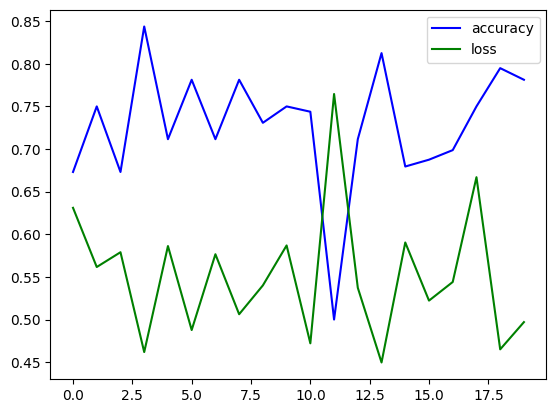

In [ ]:
# Графический вывод accuracy и loss

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy', color='b')
plt.plot(history.history['loss'], label='loss', color='g')
plt.legend()
plt.show()

In [ ]:
# Загрузка тестовых данных

from google.colab import files

uploaded=files.upload()

Saving 2148f2ad98d6d35f6b6f19414ed1352c.jpeg to 2148f2ad98d6d35f6b6f19414ed1352c.jpeg


In [ ]:
from io import BytesIO

In [ ]:
# Загрузка изображений

img = Image.open(BytesIO(uploaded['2148f2ad98d6d35f6b6f19414ed1352c.jpeg']))



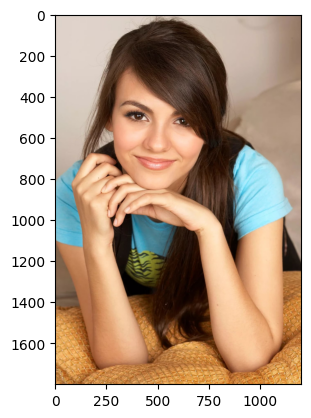

In [ ]:
# Визуализация изображения img

plt.imshow(img)

In [ ]:
# Преобразование img в numpy-массив и изменение его размера

img=np.array(img)

print(img.shape)
img.resize((200, 200, 3))

(1800, 1200, 3)


In [ ]:
# Генерация прогнозов с помощью функции predict

prediction_2=model.predict(np.array([img]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


In [ ]:
print(prediction_2)

[[1.0000000e+00 3.1136545e-12]]


In [ ]:
# Вывод результата

if prediction_2[0][0]>prediction_2[0][1]:
    print('Женщина')
elif prediction_2[0][1]>prediction_2[0][0]:
    print('Мужчина')

Женщина
